# Code to draw a nicely formatted confusion matrix

Tuesday, Feb 6, 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

## Manually generate the confusion matrix from my gradient boosted model

Easier than actually regenerating the data. To view images from the original dataset, I still need to update the deleted filepaths for the features in 'data/tree_images.csv'.

In [3]:
#Rows are actual, columns are predicted
confusion_matrix = np.array([[46, 14, 17], [18, 35, 5], [26, 12, 30]])
confusion_matrix

array([[46, 14, 17],
       [18, 35,  5],
       [26, 12, 30]])

In [4]:
species = ['Bigleaf Maple', 'London Plane', 'Sitka Spruce']
# index = pd.MultiIndex.from_product([['Actual'], species])
# columns = pd.MultiIndex.from_product([['Predicted'], species])
# confusion_df = pd.DataFrame(confusion_matrix, index=index, columns=columns)
confusion_df= pd.DataFrame(confusion_matrix, index=species, columns=species)
confusion_df

,Bigleaf Maple,London Plane,Sitka Spruce
Bigleaf Maple,46,14,17
London Plane,18,35,5
Sitka Spruce,26,12,30


### Draw a heatmap for the confusion matrix using Seaborn

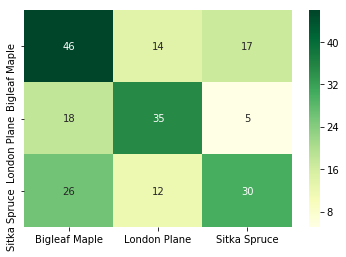

In [5]:
#http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
ax = sns.heatmap(confusion_df, annot=True, fmt='d', cmap='YlGn')

### Use Yichen Qiu's code to draw it directly using Matplotlib

Source: https://github.com/YichenQiu/Interior-Design-Style-Classifier

Thanks Yichen!

In [12]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix\n(Number of images by class)',
                          cmap=plt.cm.Blues,
                         colorbar=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm/ cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if colorbar:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    #formatter = FuncFormatter(to_percent)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 fontdict={'size': 22, 'weight': 'bold'},
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[46 14 17]
 [18 35  5]
 [26 12 30]]


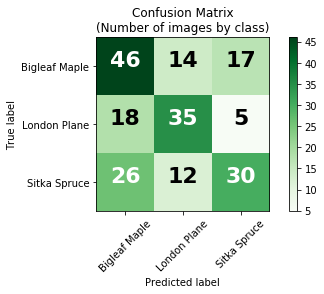

In [13]:
plot_confusion_matrix(confusion_matrix, species, cmap='Greens')

Confusion matrix, without normalization
[[46 14 17]
 [18 35  5]
 [26 12 30]]


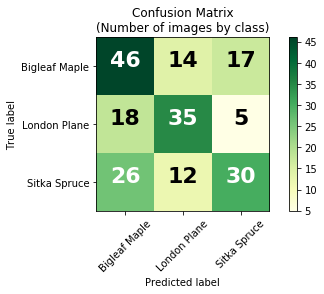

In [14]:
plt.figure()
plot_confusion_matrix(confusion_matrix, species, cmap='YlGn', colorbar=True)
plt.savefig('gb_confusion.png',bbox_inches="tight")
plt.show()

## Calculating number of current images vs. number of previous

In [15]:
527 + 541 + 574 #Current number: Acer + Platanus + Picea

1642

In [16]:
1014/3

338.0

In [17]:
1642/3

547.3333333333334

In [18]:
540/340

1.588235294117647

In [19]:
547/338

1.6183431952662721

In [20]:
1.6*5

8.0

In [21]:
5/3

1.6666666666666667

### Cross entropy for randomly guessing one of n classes is log(n)

In [26]:
-np.log(1/3) #Baseline for my model with 3 species

1.0986122886681098

In [27]:
-np.log(1/1000) #Baseline for ImageNet dataset with 1000 classes

6.9077552789821368